In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

## 1.0 Load the data set 

In [7]:


# File path
file_path = 'academic_dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())



  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

In [3]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


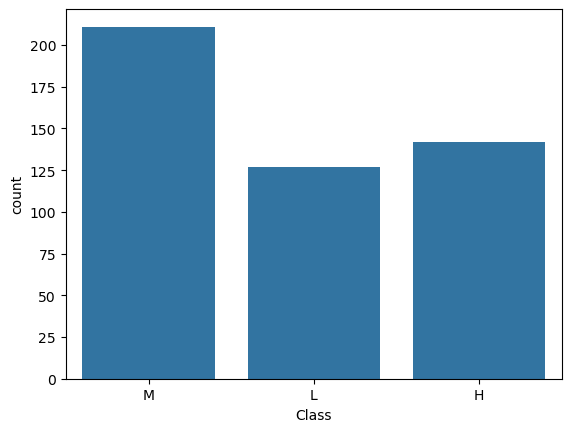

In [19]:
df.Class.value_counts()
sns.countplot(x="Class", data=df)
plt.show()


In [10]:
target_var = ['Class']

num_variables = ['raisedhands'
                 ,'VisITedResources'
                 ,'AnnouncementsView'
                 ,'Discussion'
                 ]

binary_var = ['gender'
              ,'Semester'
              ,'Relation'
              ,'ParentAnsweringSurvey'
              ,'ParentschoolSatisfaction'
              ,'StudentAbsenceDays'
              ]

cat_var = ['NationalITy'
           ,'PlaceofBirth'
           ,'StageID'
           ,'SectionID'
           ,'Topic'
           ]

## 2.0 Checkig if numerical varabiles correaltd with the target varabiles 

In [16]:
y_df = df[target_var]
y_df

,Class
0,M
1,M
2,L
3,L
4,M
...,...
475,L
476,M
477,M
478,L


In [15]:
X_df = df[num_variables]
y_array = y_df.to_numpy()


,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [17]:
y = y_df.to_numpy()
X = X_df.to_numpy()



In [18]:
from sklearn.feature_selection import f_classif

# Assuming `X` is the feature matrix and `y` is the categorical target
F_values, p_values = f_classif(X, y)
print(F_values)  # Higher F-values indicate a stronger relationship


[176.38907873 230.4729724   98.72520039  25.25304924]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
import numpy as np
from sklearn.feature_selection import f_classif

# Assuming `num_variables` is a list, convert it to a numpy array
num_variables_np = np.array(num_variables)

# print(num_variables_np.dtypes)

# # If num_variables is 1D (single feature), reshape it to be 2D
# if len(num_variables.shape) == 1:
#     num_variables = num_variables.reshape(-1, 1)

# # Assuming `target_var` is your categorical target variable
# F_values, p_values = f_classif(num_variables, target_var)
# print(F_values)  # Higher F-values indicate a stronger relationship


### 2.1 Box plots 

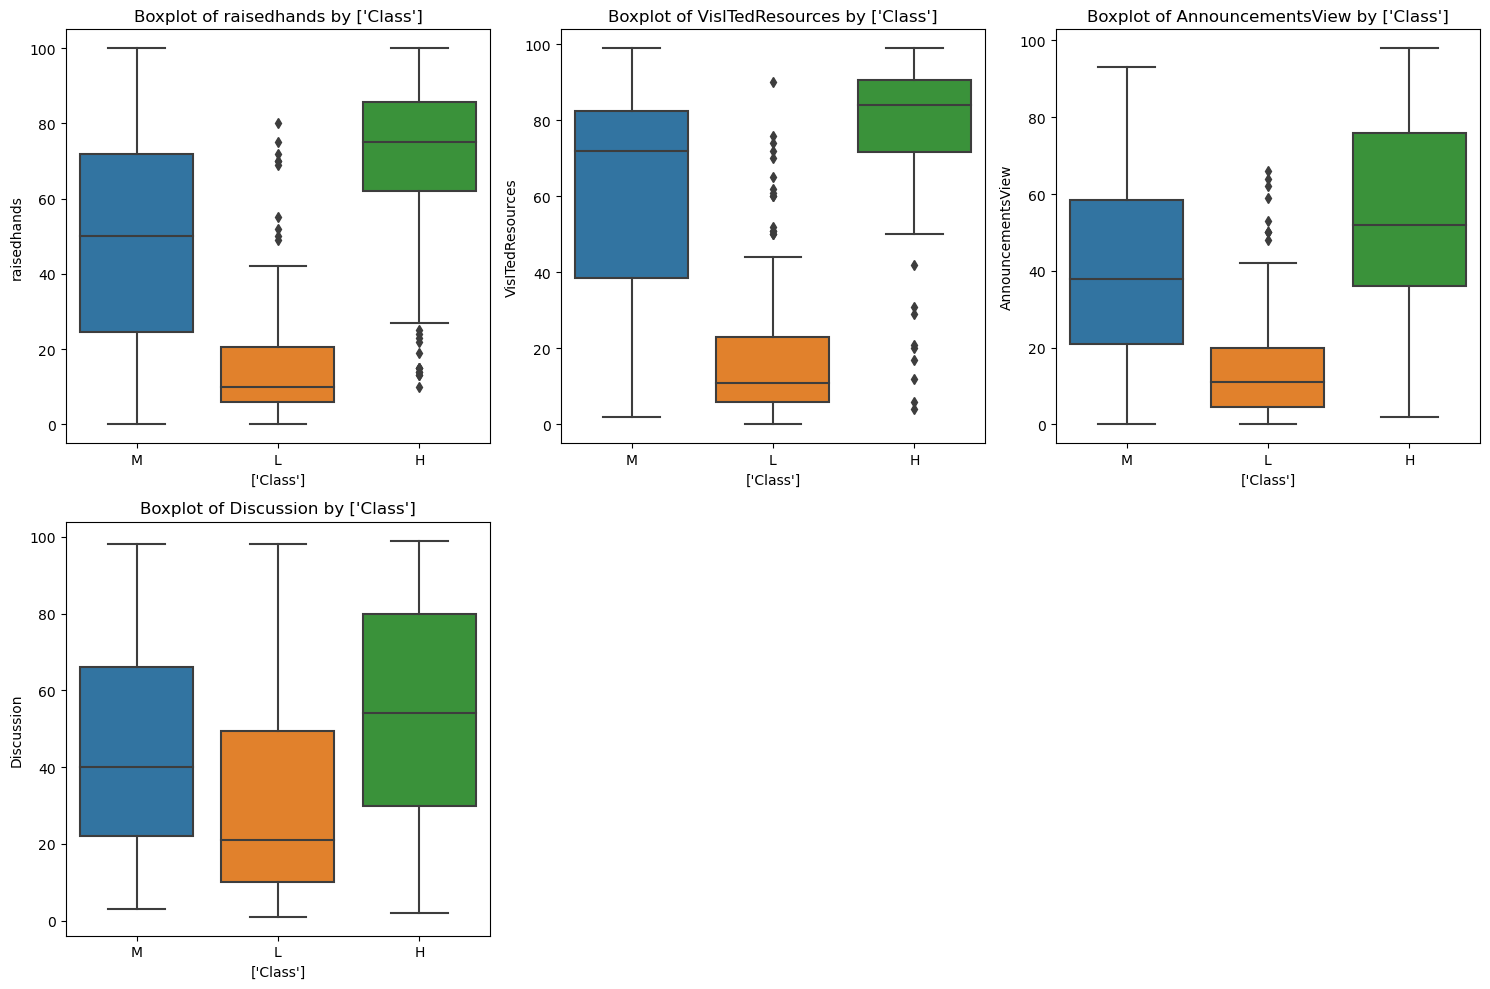

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataframe, `target_var` is your categorical column,
# and `num_features` is a list of numerical feature columns
num_features = num_variables  # Add your actual column names

# Set up the grid for subplots
n_features = len(num_features)
n_rows = (n_features + 2) // 3  # Number of rows for 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Create a grid for the plots

# Flatten axes to handle it easily in a loop
axes = axes.flatten()

# Loop through numerical features and plot boxplot for each one
for i, feature in enumerate(num_features):
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by {target_var}')
    axes[i].set_xlabel(target_var)
    axes[i].set_ylabel(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Display the plots
plt.tight_layout()
plt.show()


# 3.0 Conclusion 

from cnumerical features is that raise hands and visited resources play a major role in distribution

# 4.0 Categoerical varaible annalysis 


In [24]:
cat_var

['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Topic']

In [32]:
df[feature].shape

(480,)

In [26]:
df[feature]

0          KW
1          KW
2          KW
3          KW
4          KW
        ...  
475    Jordan
476    Jordan
477    Jordan
478    Jordan
479    Jordan
Name: NationalITy, Length: 480, dtype: object

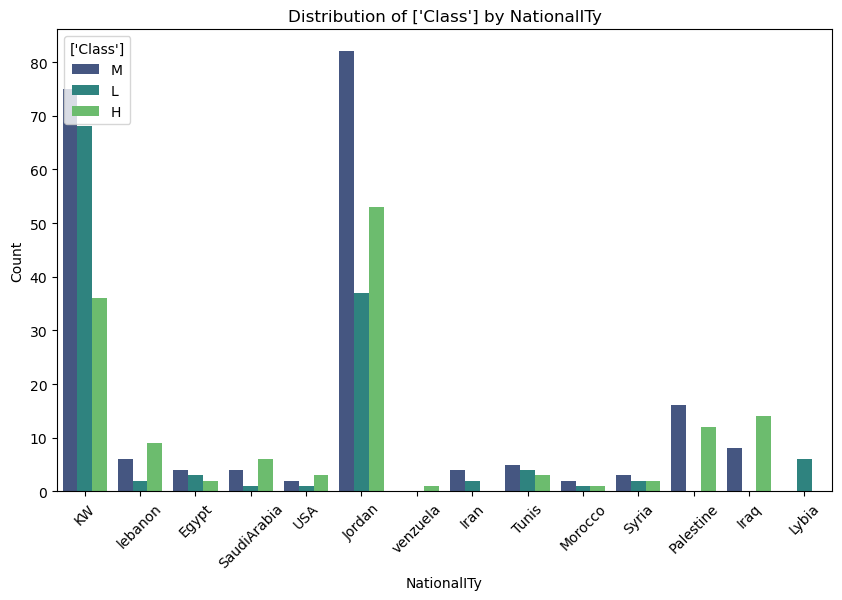

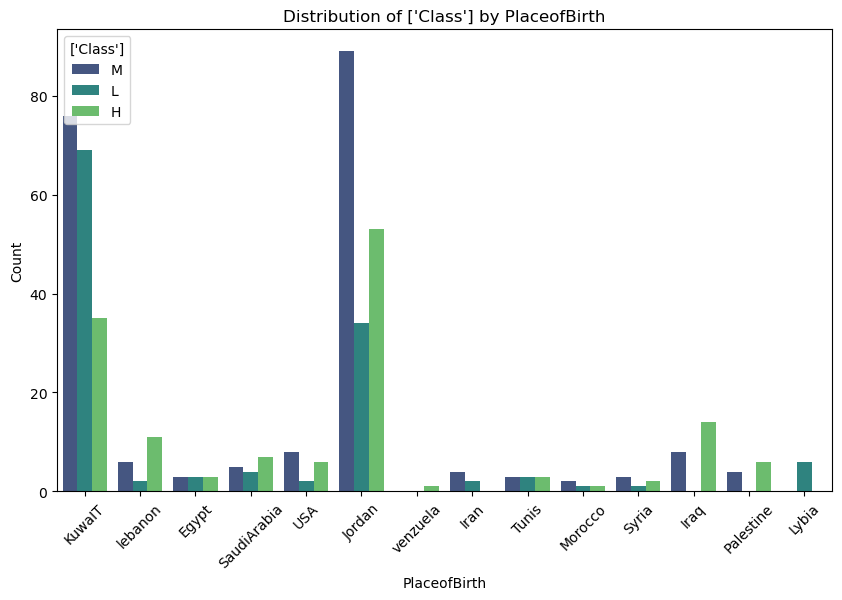

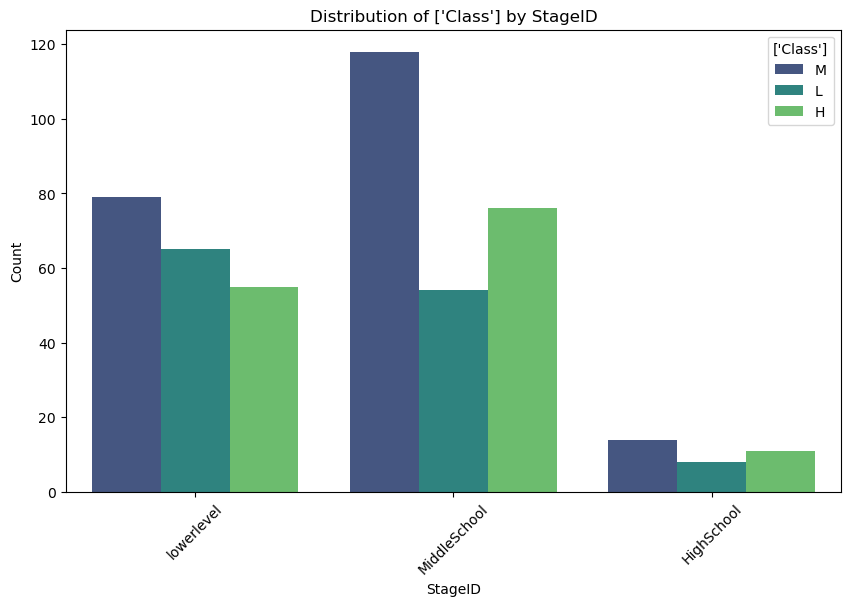

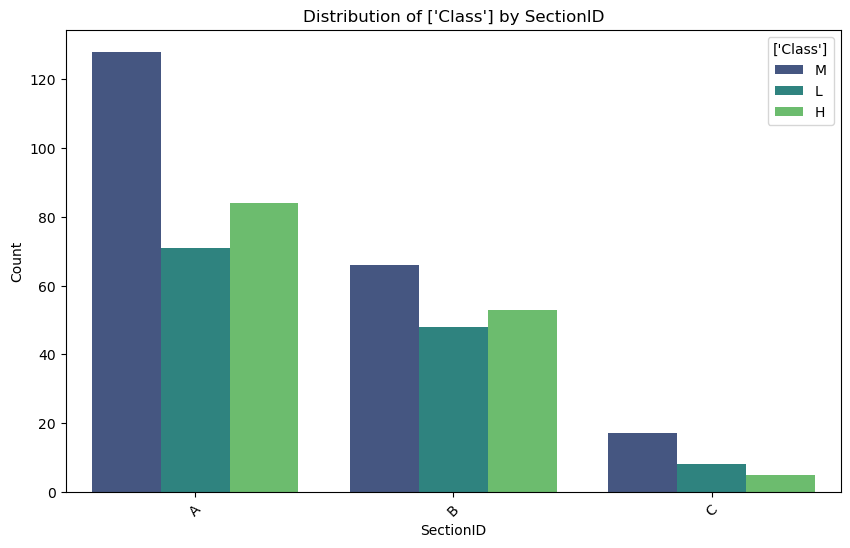

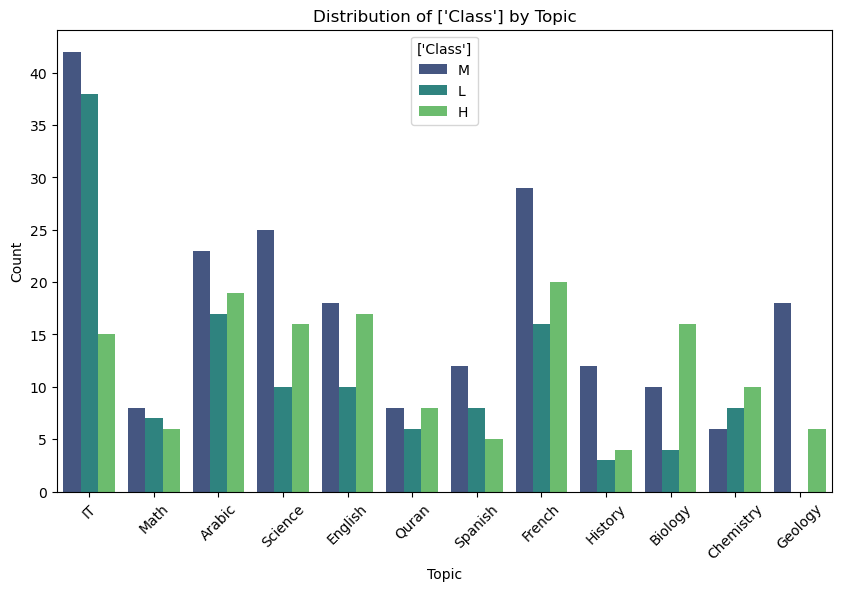

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame, `target_var` is your categorical target,
# and `categorical_features` is a list of your categorical feature columns
for feature in cat_var:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Class', palette='viridis')
    plt.title(f'Distribution of {target_var} by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=target_var)
    plt.show()


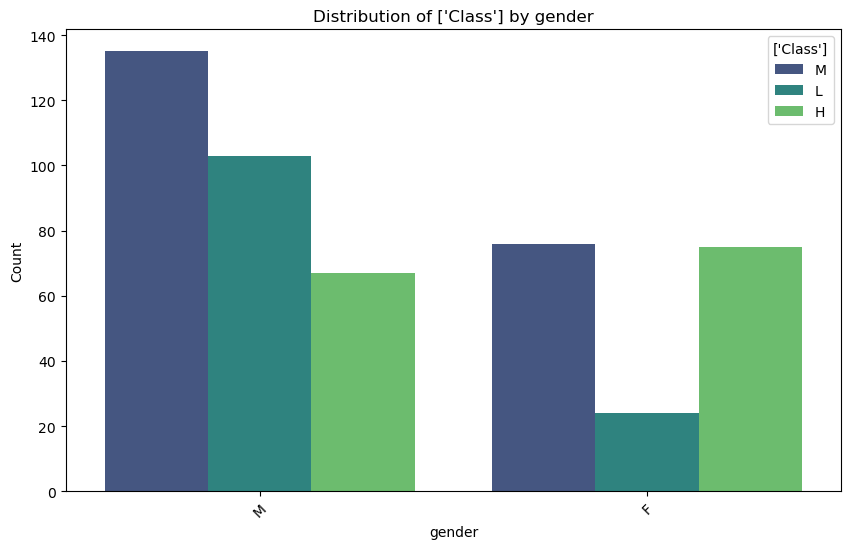

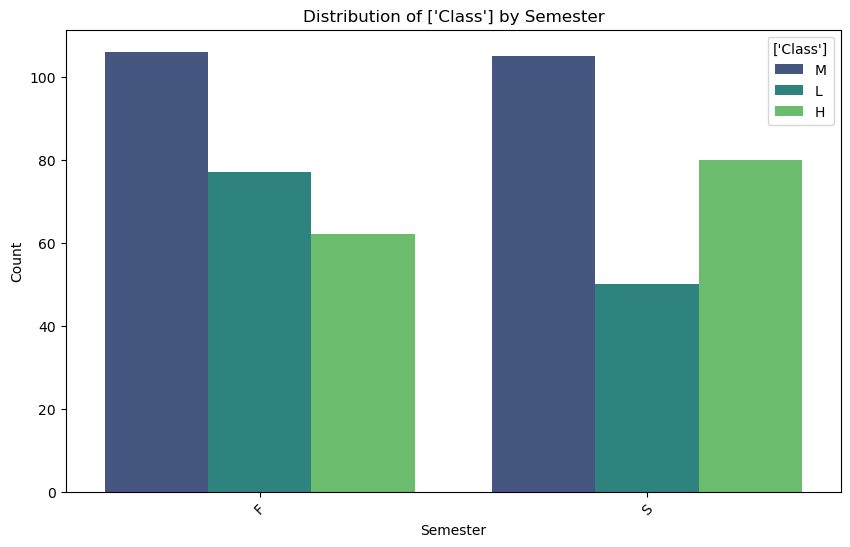

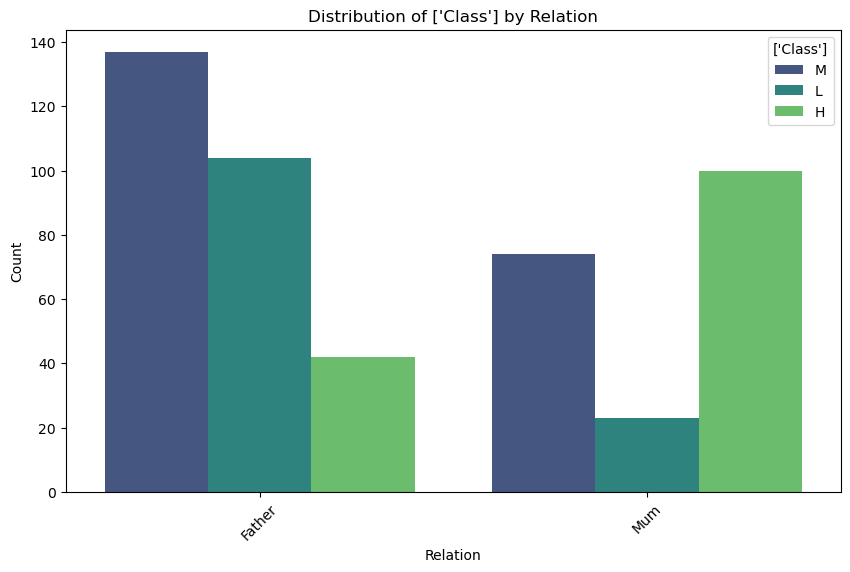

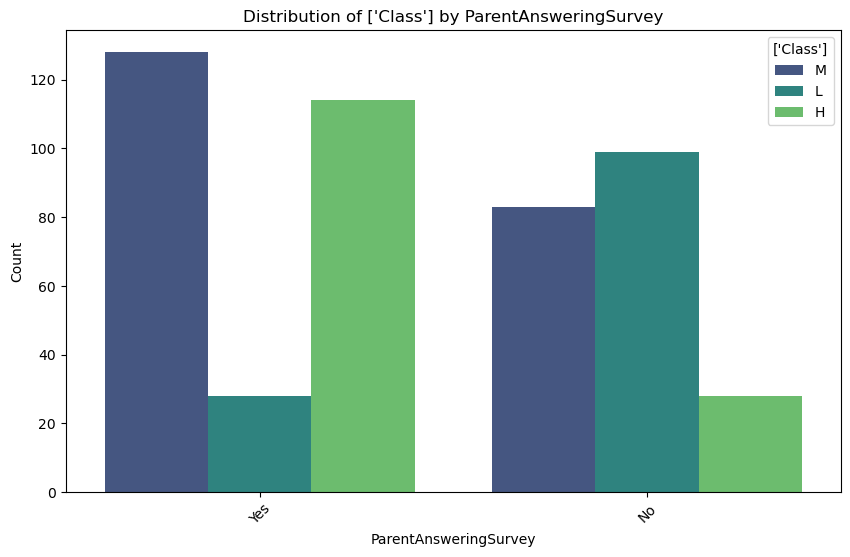

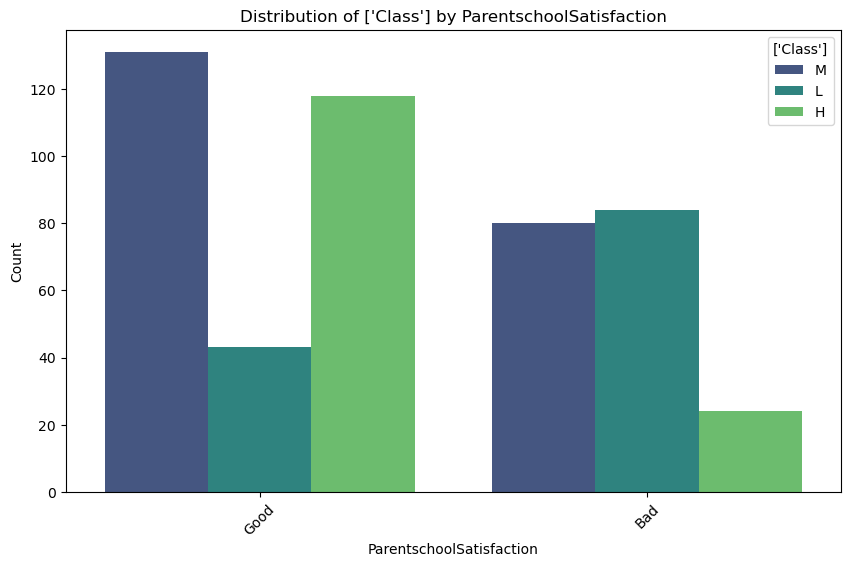

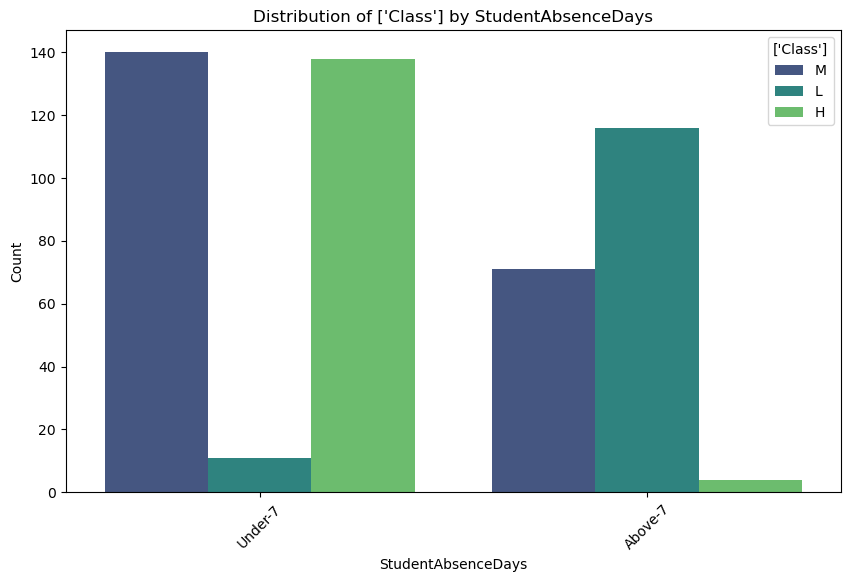

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame, `target_var` is your categorical target,
# and `categorical_features` is a list of your categorical feature columns
for feature in binary_var:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Class', palette='viridis')
    plt.title(f'Distribution of {target_var} by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=target_var)
    plt.show()
